## Observations and Insights 

The final tumor volume in mice treated with Capomulin or Ramicane was lower than the final tumor volume in mice treated with Infubinol or Ceftamin treatments. 

There is a significant positive correlation between mouse weight and tumor size which may affect the interpretation of results (final tumor size should be normalized by mouse weight). 

The Capomulin treatment had slightly more timepoints than other treatments, and a similar proportion of male and female mice were used in this study.

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata,study_results, how = "left", on = "Mouse ID")

# Display the data table for preview
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(mouse_data['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_data.loc[mouse_data.duplicated(subset=['Mouse ID', 'Timepoint']),:]
duplicates['Mouse ID']

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_cleaned = mouse_data.loc[(mouse_data['Mouse ID'] !='g989')]

In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_data_cleaned['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# Use describe function to calculate mean and standard deviation of the tumor volume 
regimen = mouse_data_cleaned.groupby(['Drug Regimen'])
regimen_summary = regimen['Tumor Volume (mm3)'].describe()
regimen_summary = regimen_summary[['mean','std']]

# Calculate median, variance, and SEM of the tumor volume. 
median = regimen['Tumor Volume (mm3)'].median()
variance = regimen['Tumor Volume (mm3)'].var()
sem = regimen['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
regimen_summary["median"] = median
regimen_summary["variance"] = variance
regimen_summary["SEM"] = sem
regimen_summary

,mean,std,median,variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,41.557809,24.947764,0.329346
Ceftamin,52.591172,6.268188,51.776157,39.290177,0.469821
Infubinol,52.884795,6.567243,51.820584,43.128684,0.492236
Ketapril,55.235638,8.279709,53.698743,68.553577,0.603860
Naftisol,54.331565,8.134708,52.509285,66.173479,0.596466
Placebo,54.033581,7.821003,52.288934,61.168083,0.581331
Propriva,52.320930,6.622085,50.446266,43.852013,0.544332
Ramicane,40.216745,4.846308,40.673236,23.486704,0.320955
Stelasyn,54.233149,7.710419,52.431737,59.450562,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen['Tumor Volume (mm3)'].aggregate(func = ['mean', 'median', 'var', 'std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

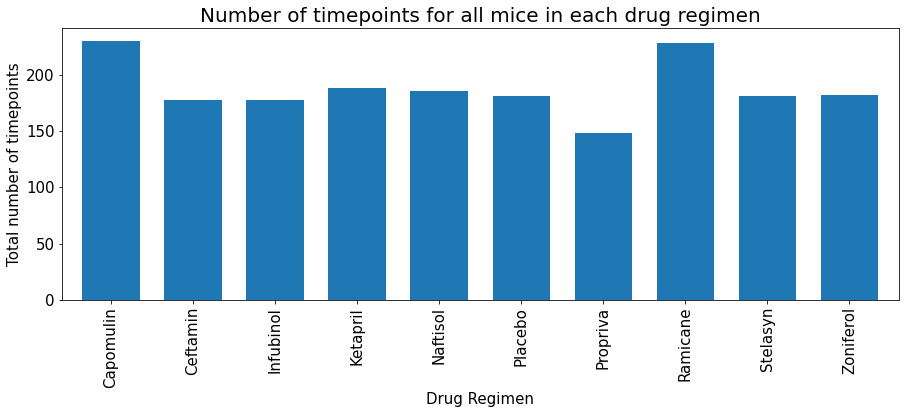

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas

#Filter dataset
timepoints = mouse_data_cleaned.groupby(['Drug Regimen']).count()
data = timepoints['Timepoint']

# Use DataFrame.plot() in order to create a bar chart of the data
data.plot(kind="bar", figsize=(15,5), width=0.7, fontsize = '15')

# Set a title for the chart
plt.title("Number of timepoints for all mice in each drug regimen", fontsize='20')
plt.ylabel("Total number of timepoints", fontsize = '15')
plt.xlabel("Drug Regimen", fontsize = '15')

plt.show()

Text(0.5, 0, 'Drug Regimen')

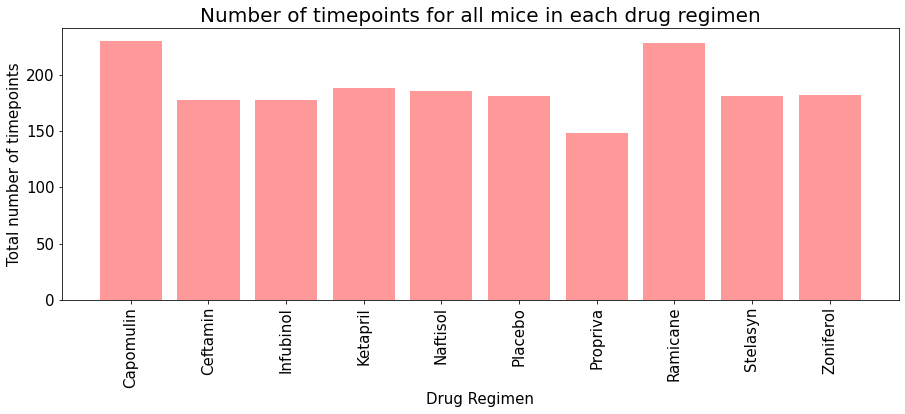

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
data = timepoints.reset_index()
data

# Set x axis and tick locations
x_axis = np.arange(len(data['Drug Regimen']))
tick_locations = [value for value in x_axis]

 # Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(15,5))
plt.bar(x_axis, data["Timepoint"], color='r', alpha=0.4, align="center")
plt.yticks(fontsize=15)
plt.xticks(tick_locations, data["Drug Regimen"], rotation="vertical")
plt.xticks(fontsize=15)
plt.title("Number of timepoints for all mice in each drug regimen", fontsize='20')
plt.ylabel("Total number of timepoints", fontsize = '15')
plt.xlabel("Drug Regimen", fontsize = '15')


<AxesSubplot:title={'center':'Distribution of male and female mice used in study'}, ylabel='Sex'>

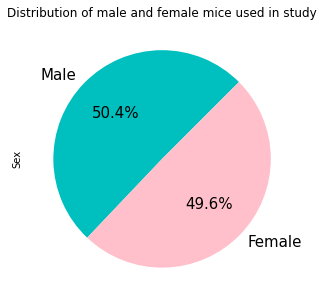

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = mouse_data_cleaned.drop_duplicates(subset=["Mouse ID"])
sex = gender["Sex"].value_counts()

sex.plot.pie(figsize = (5,5), title = "Distribution of male and female mice used in study", fontsize = '15',startangle=45,autopct='%1.1f%%', colors = ['c','pink'])

Text(0.5, 1.0, 'Distribution of male and female mice used in study')

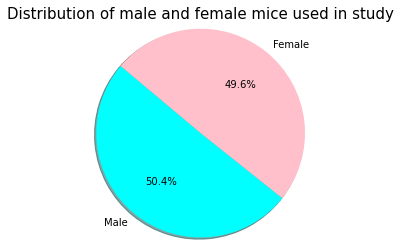

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [125,123]
colors = ['cyan', 'pink']
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, radius=1.2)
plt.title("Distribution of male and female mice used in study", fontsize='15')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
treatment_df = mouse_data_cleaned.set_index(['Drug Regimen'])
treatment_filtered = treatment_df.loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']]
mouse = treatment_filtered.groupby(["Mouse ID"])
last_time = mouse["Timepoint"].max()
last_time_df = pd.DataFrame(last_time)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
treat = treatment_filtered.reset_index()
merged_df = pd.merge(treat, last_time_df, on="Mouse ID",how='left')
end = merged_df.loc[((merged_df['Timepoint_x']) == merged_df['Timepoint_y'])]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
Capomulin = []
Ramicane = []
Infubinol = []
Ceftamin = []

    
# Locate the rows which contain mice on each drug and get the tumor volumes, add subset, determine outliers using upper and lower bounds 
    #Capomulin
Capomulin_treatment = end.loc[(end['Drug Regimen'] == "Capomulin")]
cap = Capomulin_treatment['Tumor Volume (mm3)']
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = cap.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower = lowerq - (1.5*iqr)
upper = upperq + (1.5*iqr)

Cap_iqr = Capomulin_treatment.loc[(Capomulin_treatment['Tumor Volume (mm3)'] > lower) & (Capomulin_treatment['Tumor Volume (mm3)'] < upper)]
Capomulin.append(Cap_iqr['Tumor Volume (mm3)'])

 #Ramicane
Ramicane_treatment = end.loc[(end['Drug Regimen'] == "Ramicane")]
ram = Ramicane_treatment['Tumor Volume (mm3)']
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = ram.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower = lowerq - (1.5*iqr)
upper = upperq + (1.5*iqr)

Ram_iqr = Ramicane_treatment.loc[(Ramicane_treatment['Tumor Volume (mm3)'] > lower) & (Ramicane_treatment['Tumor Volume (mm3)'] < upper)]
Ramicane.append(Ram_iqr['Tumor Volume (mm3)'])

    #Infubinol
Infubinol_treatment = end.loc[(end['Drug Regimen'] == "Infubinol")]
inf = Infubinol_treatment['Tumor Volume (mm3)']
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = inf.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower = lowerq - (1.5*iqr)
upper = upperq + (1.5*iqr)

Inf_iqr = Infubinol_treatment.loc[(Infubinol_treatment['Tumor Volume (mm3)'] > lower) & (Infubinol_treatment['Tumor Volume (mm3)'] < upper)]
Infubinol.append(Inf_iqr['Tumor Volume (mm3)'])

    #Ceftamin
Ceftamin_treatment = end.loc[(end['Drug Regimen'] == "Ceftamin")]
cef = Ceftamin_treatment['Tumor Volume (mm3)']

 # Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = cef.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower = lowerq - (1.5*iqr)
upper = upperq + (1.5*iqr)

Cef_iqr = Ceftamin_treatment.loc[(Ceftamin_treatment['Tumor Volume (mm3)'] > lower) & (Ceftamin_treatment['Tumor Volume (mm3)'] < upper)]
Ceftamin.append(Cef_iqr['Tumor Volume (mm3)'])

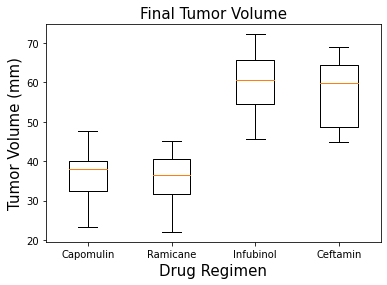

In [54]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


data = [(Cap_iqr["Tumor Volume (mm3)"]), (Ram_iqr["Tumor Volume (mm3)"]), (Inf_iqr["Tumor Volume (mm3)"]),(Cef_iqr["Tumor Volume (mm3)"])]
fig7, ax7 = plt.subplots()
ax7.set_title('Final Tumor Volume', fontsize = '15')
ax7.boxplot(data)

plt.xticks([1, 2, 3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylabel("Tumor Volume (mm)", fontsize = '15')
plt.xlabel("Drug Regimen", fontsize = '15')

plt.show()

## Line and Scatter Plots

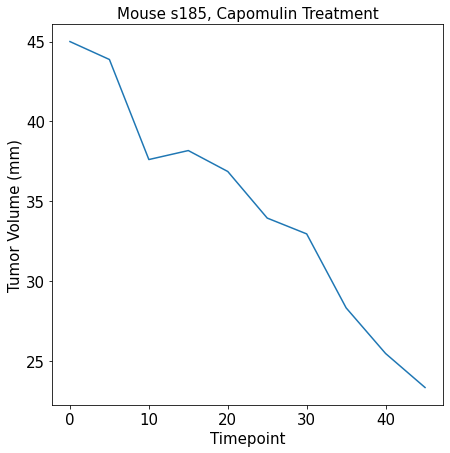

In [62]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
data = mouse_data_cleaned.loc[(mouse_data_cleaned['Drug Regimen'] == "Capomulin") & (mouse_data_cleaned['Mouse ID'] == "s185")]

data_plot = data[['Timepoint','Tumor Volume (mm3)']]

data_plot.plot(kind="line", x = 'Timepoint', y = 'Tumor Volume (mm3)', legend=False, figsize = (7,7))

plt.title("Mouse s185, Capomulin Treatment", fontsize = '15')
plt.ylabel("Tumor Volume (mm)", fontsize = '15')
plt.xlabel("Timepoint", fontsize = '15')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

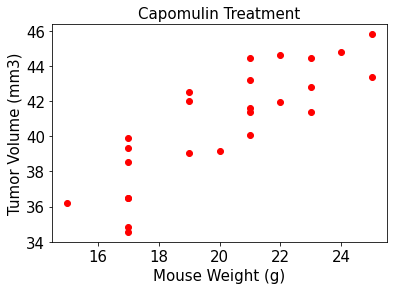

In [74]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Create Capomulin subset and group by mouse ID 
data = mouse_data_cleaned.loc[(mouse_data_cleaned['Drug Regimen'] == "Capomulin")]
data_grouped = data.groupby(["Mouse ID"])

#Calculate average to create x and y values 
ave_volume = data_grouped['Tumor Volume (mm3)'].mean()
weight = data_grouped['Weight (g)'].mean()

#Plot data
plt.title("Capomulin Treatment", fontsize = '15')
plt.xlabel("Mouse Weight (g)", fontsize = '15')
plt.ylabel("Tumor Volume (mm3)", fontsize = '15')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cap_plot = plt.scatter(weight, ave_volume, marker="o", color="red")
plt.show()

## Correlation and Regression

Correlation coefficient = 0.84
Linear regression model: y = 0.95x + 21.55
P-Value = 1.3225722434712642e-07


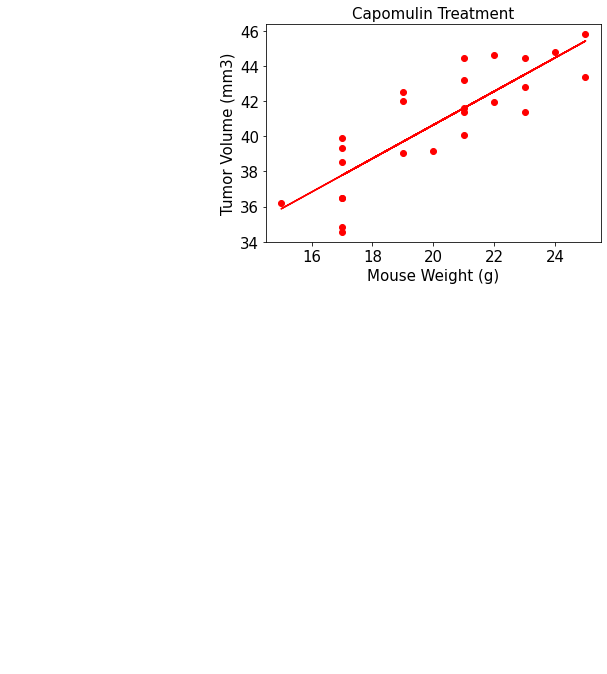

In [92]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = weight
y_values = ave_volume
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')


#Plot data
plt.title("Capomulin Treatment", fontsize = '15')
plt.xlabel("Mouse Weight (g)", fontsize = '15')
plt.ylabel("Tumor Volume (mm3)", fontsize = '15')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cap_plot = plt.scatter(weight, ave_volume, marker="o", color="red")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()